In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
clicks = pd.read_csv("./sample_clicks.csv")

In [3]:
bid_requests = pd.read_csv("./sample_bid_requests.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (39,40,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
impressions = pd.read_csv("./sample_impressions.csv")

In [5]:
pd.options.display.max_columns = 100
clicks.head()

,Unnamed: 0,ad,adSize,adType,age,backendStatus,bestVenueName,bidPrice,campaign,carrier,country,day,deviceName,deviceType,dimensions,elbStatus,exchange,gender,iabCategories,impId,landingPage,location,month,os,path,region,state,targetGroup,timestamp,udid,venueType,year,zip
0,0,17183,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme android-320x50-us only,3.00,1746,T-MOBILE,usa,10,lg,4,eJwlULtuwzAM_BWDs-RYL4vy1gAdAjRohwwFkg6KLbtB_I...,200,nexage,NaN,['IAB14'],af830061-7b3f-4efa-a612-c3ca76bbb397,http://kirklands.com,"[26.157688, -97.82809]",9,android,/rtb2/click,TX,usa-tx,24981,2016-09-10 14:17:04.591,9581192c-778f-424a-845b-e9f3d9cfceea,app,2016,78559
1,1,14608,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme_ios_320x50_new,4.50,1604,WIFI,usa,10,apple iphone,4,eJxFkttq3DAQhl9l0YWvZFsny_YGU7yHFEPTFBroxToYxV...,200,nexage,NaN,['IAB14'],f7e703fa-4eb7-44b2-80b5-1a6c108f39f2,https://trkn.us/click/?partner=700&c=2532&p=12...,"[33.7566, -84.3894]",9,ios,/rtb2/click,GA,usa-ga,21219,2016-09-10 14:17:25.949,507C092D-FBA8-4135-ADE4-A9C0AEBC6D0D,app,2016,30303
2,2,13569,320x50,3rd Party Tag,NaN,200,Myyearbook android,3.00,1534,WIFI,usa,10,NaN,4,eJw9UU1vwjAM_SvIB05pSdO0aZCqaR9M44CYEBuHMaG0MV...,200,nexage,NaN,['IAB14'],b98f47a6-9e17-4e64-8dbf-337dc2f8a63a,http://s-cdn-tag.medialytics.com/clk?type=r&ta...,"[38.9242, -79.8508]",9,android,/rtb2/click,WV,usa-wv,19707,2016-09-10 14:18:14.283,4c17dea9-5e49-4472-8ddd-8db637894b26,app,2016,26241
3,3,17175,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme android-320x50-us only,4.50,1746,WIFI,usa,10,NaN,4,eJwlUMtugzAQ_BW05zXxExtu7aFSDq16iNRD0oMTDEUYiM...,200,nexage,NaN,['IAB14'],55046e26-6129-4619-936c-f64c70929290,http://kirklands.com,"[35.075863, -89.94052]",9,android,/rtb2/click,TN,usa-tn,24968,2016-09-10 14:18:20.515,a01d4e16-ac8f-4284-b792-f0a15830bd53,app,2016,38118
4,4,16156,320x50,3rd Party Tag,28.0,200,Grindr android,5.25,1719,T-MOBILE,usa,10,htc htc 10,4,eJw9UUtPwkAQ_itkDj1ty85unySNoUENiSgRDhrw0G4Lrr...,200,mopub,M,"['IAB1', 'IAB24']",31c5ab8c-91b5-409d-86d4-f3a9d83587de,https://bs.serving-sys.com/BurstingPipe/adServ...,"[30.339281, -97.698097]",9,android,/rtb2/click,TX,usa-tx,23411,2016-09-10 14:19:00.772,ece0d2d1-5cd9-460b-94f2-723b32b3120b,app,2016,78728


In [6]:
clicks.columns

Index(['Unnamed: 0', 'ad', 'adSize', 'adType', 'age', 'backendStatus',
       'bestVenueName', 'bidPrice', 'campaign', 'carrier', 'country', 'day',
       'deviceName', 'deviceType', 'dimensions', 'elbStatus', 'exchange',
       'gender', 'iabCategories', 'impId', 'landingPage', 'location', 'month',
       'os', 'path', 'region', 'state', 'targetGroup', 'timestamp', 'udid',
       'venueType', 'year', 'zip'],
      dtype='object')

In [17]:
missing_vals = pd.DataFrame(clicks.isnull().sum())
missing_vals['column'] = missing_vals.index
missing_vals['unique'] = [len(clicks[col].unique()) for col in clicks.columns]
missing_vals['na_count'] = missing_vals[0]
missing_vals['na_frac'] = 100*clicks.isnull().sum()/len(clicks)
missing_vals = missing_vals.drop(0, axis=1)
missing_vals.index = range(len(missing_vals))
missing_vals

,column,unique,na_count,na_frac
0,Unnamed: 0,16243,0,0.000000
1,ad,412,0,0.000000
2,adSize,6,0,0.000000
3,adType,3,0,0.000000
4,age,70,31656,64.963369
5,backendStatus,1,0,0.000000
6,bestVenueName,1305,0,0.000000
7,bidPrice,42,0,0.000000
8,campaign,67,0,0.000000
9,carrier,63,4023,8.255864


Column:  ad
Unique values:  412 

17235    6513
16897    3639
4935     1008
14608     906
17236     891
17076     822
10672     783
16246     768
17181     762
14606     735
16237     726
15096     714
16904     687
16158     663
16915     627
14216     600
14605     573
16234     540
16909     513
13569     462
Name: ad, dtype: int64 



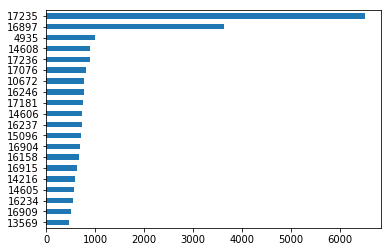

Column:  adSize
Unique values:  6 

320x50     24090
300x250    13728
320x480     9024
728x90      1779
480x320       96
666x333       12
Name: adSize, dtype: int64 



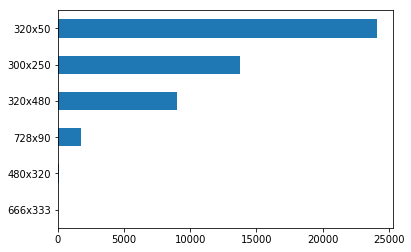

Column:  adType
Unique values:  3 

Rich media         26625
3rd Party Tag      19095
3rd party video     3009
Name: adType, dtype: int64 



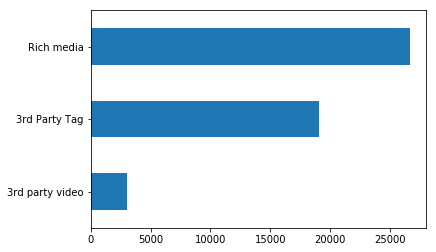

Column:  age
Unique values:  69 

21.0    1125
19.0     996
20.0     960
18.0     936
22.0     924
23.0     891
25.0     879
24.0     858
26.0     723
27.0     687
28.0     669
29.0     579
30.0     498
35.0     453
31.0     399
32.0     360
46.0     354
33.0     321
45.0     306
37.0     303
Name: age, dtype: int64 



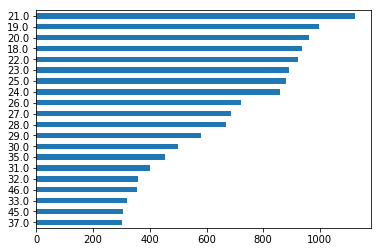

Column:  backendStatus
Unique values:  1 

200    48729
Name: backendStatus, dtype: int64 



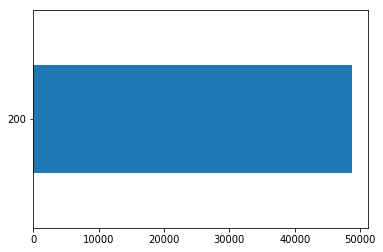

Column:  bestVenueName
Unique values:  1305 

Meetme - android_meetme_android_300x250_top of the waterfall_usa only_android_mediumrectangle_300x250_iab1,iab14    3927
Grindr ios                                                                                                          1917
Myyearbook.com-meetme android-320x50-us only                                                                        1782
Adme_adme_lockscreen_320x480_android_tier3_android_iab_full_screen_320x480_iab1                                     1722
Grindr android                                                                                                      1620
Words with friends 2 android                                                                                        1605
Meetme - iphone_meetme_ios_300x250_tier3_ios_mediumrectangle_300x250_iab1                                           1065
Meetme iphone 320x50 us only                                                                               

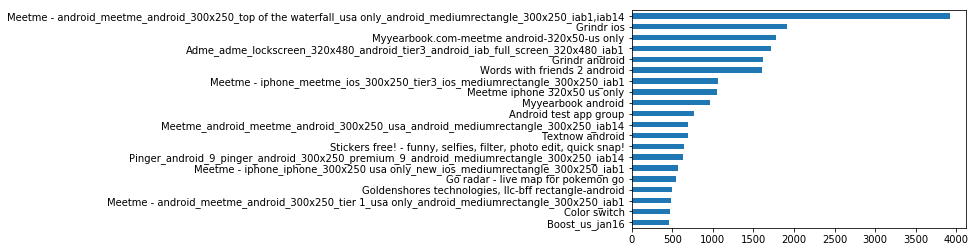

Column:  bidPrice
Unique values:  42 

3.00     17640
4.50      9654
4.00      4272
12.00     3051
1.50      1902
3.50      1659
6.00      1647
9.00      1560
5.25      1242
8.00      1200
10.00     1056
8.50      1023
5.00       543
8.60       540
2.00       465
0.50       300
1.00       216
1.75       153
11.00      114
13.50       96
Name: bidPrice, dtype: int64 



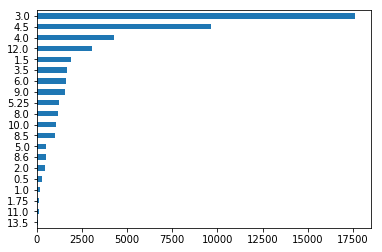

Column:  campaign
Unique values:  67 

1691    7980
1746    5259
1579    4812
1562    3576
1604    3147
1731    2886
1534    2400
1337    2220
725     1185
1642    1089
1507     945
1341     927
1720     900
1766     813
1757     762
1688     732
1648     714
1536     633
1760     627
1483     582
Name: campaign, dtype: int64 



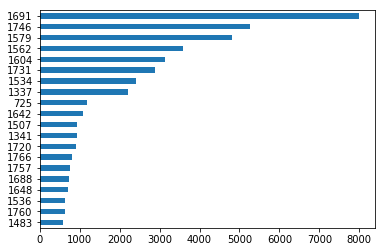

Column:  carrier
Unique values:  62 

UNKNOWN - PROBABLY WLAN                        15072
T-MOBILE                                        6645
WIFI                                            6477
AT&T                                            3771
VERIZON                                         3609
SPRINT                                          2208
WLAN                                            1257
VERIZON WIRELESS                                1098
BOOST                                            906
SPRINT NEXTEL                                    858
AT&T MOBILITY                                    843
ROGERS WIRELESS                                  453
TELUS MOBILITY, KOODO MOBILE, PUBLIC MOBILE      279
BELL MOBILITY, VIRGIN MOBILE CANADA              267
U.S. CELLULAR                                    141
FIDO                                             129
SERVICE PROVIDER CORPORATION                     114
WIND MOBILE                                      111
BELL MOB

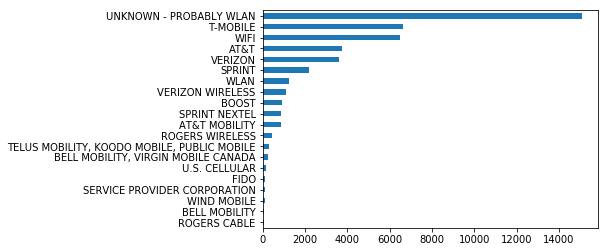

Column:  country
Unique values:  3 

usa    46230
can     2487
br        12
Name: country, dtype: int64 



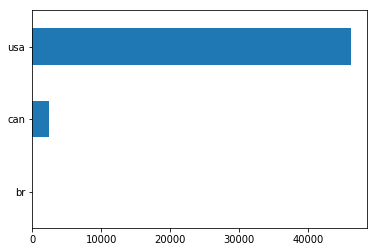

Column:  day
Unique values:  20 

20    5010
22    4992
10    4977
5     3957
4     3192
3     2931
11    2565
17    2346
7     2148
21    1983
6     1740
12    1671
8     1623
15    1587
9     1548
2     1497
14    1494
1     1437
13    1236
16     795
Name: day, dtype: int64 



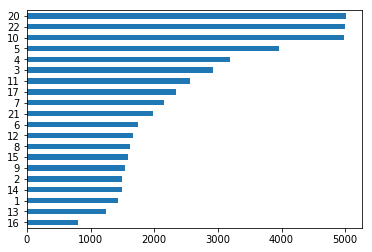

Column:  deviceName
Unique values:  1029 

apple iphone            11580
apple ipad               1764
generic android 2.0      1245
apple iphone 6            960
apple iphone 6s           792
apple iphone 5s           615
lg                        615
apple ipod touch          522
samsung sm-g920v          504
samsung sm-g900v          483
apple iphone 6s plus      414
lg ms330                  396
samsung sm-g730a          366
samsung sm-g930v          336
apple iphone 6 plus       327
samsung sm-g900t          303
samsung                   297
samsung sm-g900p          282
motorola xt1585           255
samsung sm-n920p          252
Name: deviceName, dtype: int64 



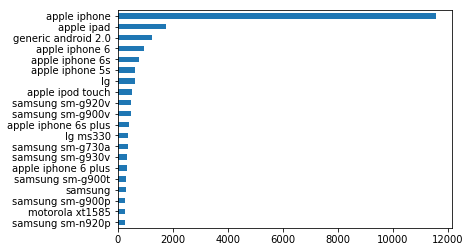

Column:  deviceType
Unique values:  3 

4    46269
5     2457
1        3
Name: deviceType, dtype: int64 



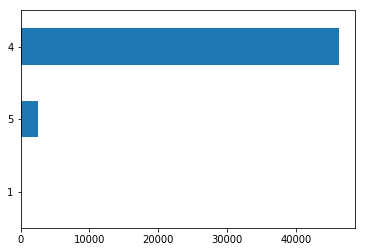

Column:  elbStatus
Unique values:  1 

200    48729
Name: elbStatus, dtype: int64 



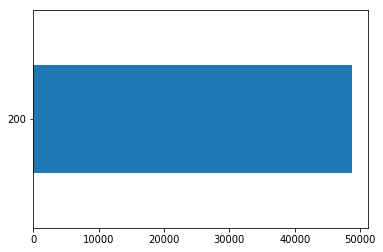

Column:  exchange
Unique values:  5 

smaato        21048
mopub         16149
nexage         8553
rubicon        2967
sitomobile       12
Name: exchange, dtype: int64 



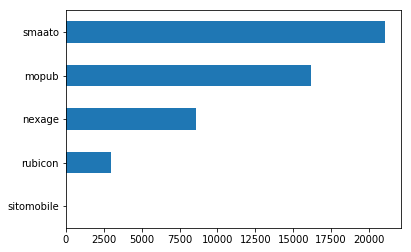

Column:  gender
Unique values:  2 

M    13896
F     5406
Name: gender, dtype: int64 



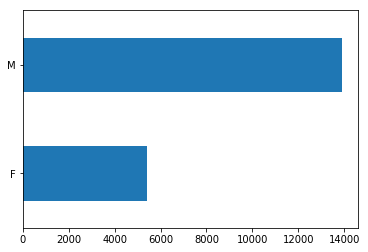

Column:  iabCategories
Unique values:  201 

['IAB1']                        8799
['IAB14']                       8799
['IAB1', 'IAB14']               4335
['IAB1', 'IAB9', 'IAB9-30']     3900
['IAB1', 'IAB24']               2838
['IAB9']                        2514
['IAB14', 'IAB24']              2040
['IAB1', 'IAB9']                1158
['IAB24', 'IAB3']               1014
['IAB24', 'IAB9', 'IAB9-23']     918
['IAB3']                         777
['IAB3', 'IAB9', 'IAB9-30']      576
['IAB24', 'IAB9', 'IAB9-30']     537
['IAB1', 'IAB1-6']               534
['IAB14', 'IAB3']                528
['IAB19', 'IAB19-8']             504
['IAB9-30', 'IAB9']              489
['IAB15']                        450
['IAB1-6', 'IAB1']               426
['IAB14-3', 'IAB14']             417
Name: iabCategories, dtype: int64 



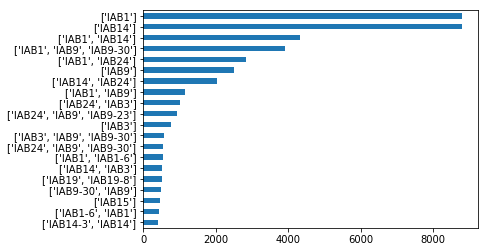

Column:  landingPage
Unique values:  168 

https://net10.com                                                                                                                                                                                                                                                                           7455
http://kirklands.com                                                                                                                                                                                                                                                                        5259
http://unwash.com                                                                                                                                                                                                                                                                           4812
http://ford.com                                                                           

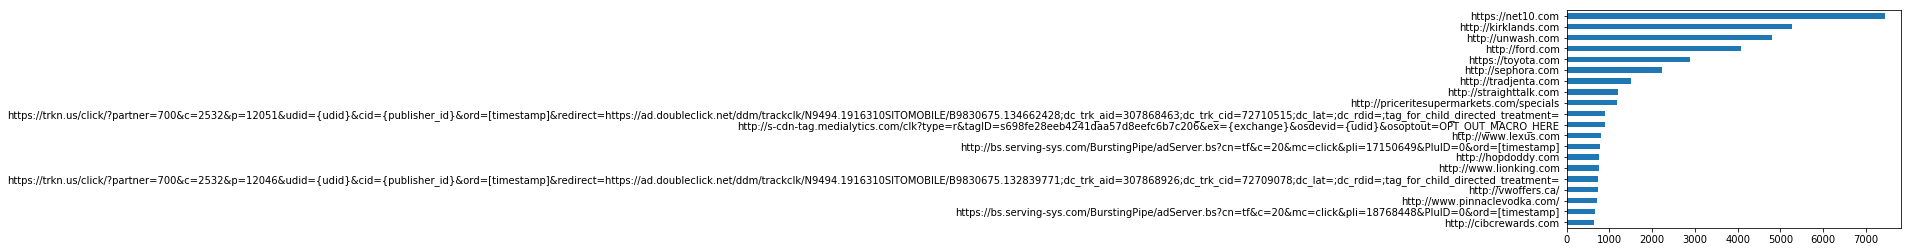

Column:  month
Unique values:  1 

9    48729
Name: month, dtype: int64 



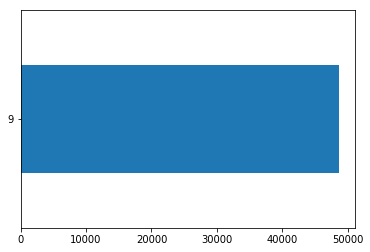

Column:  os
Unique values:  4 

android    30756
ios        17928
osx           12
unknown        6
Name: os, dtype: int64 



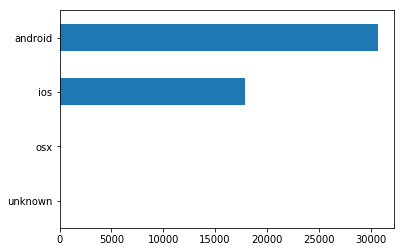

Column:  path
Unique values:  1 

/rtb2/click    48729
Name: path, dtype: int64 



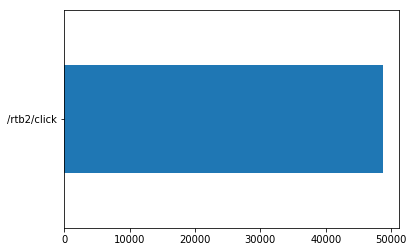

Column:  region
Unique values:  77 

TX    5841
CA    3939
NY    3480
IL    2136
FL    1707
PA    1521
GA    1422
OH    1317
VA    1308
NJ    1284
MO    1263
ON    1062
MA    1029
MD     951
IA     822
TN     807
KS     798
AZ     783
NE     714
MI     687
Name: region, dtype: int64 



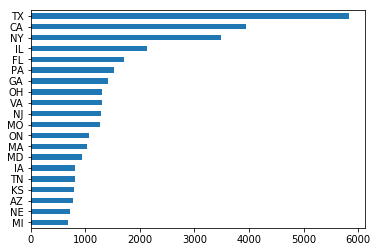

Column:  state
Unique values:  98 

usa-      6294
usa-tx    5823
usa-ca    3921
usa-ny    3405
usa-il    2130
usa-fl    1701
usa-pa    1521
usa-ga    1419
usa-oh    1314
usa-va    1308
usa-nj    1275
usa-mo    1257
can-on    1062
usa-ma    1029
usa-md     942
usa-ia     819
usa-tn     807
usa-ks     786
usa-az     780
usa-ne     714
Name: state, dtype: int64 



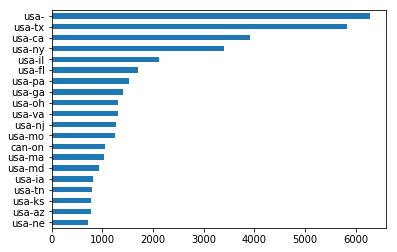

Column:  targetGroup
Unique values:  455 

25108    6513
24623    3639
8800     1008
21219     906
25113     891
24847     822
23617     768
21217     735
23613     726
23416     663
24638     624
20491     600
23634     576
21221     573
23622     540
24634     513
24956     465
19707     462
19716     456
25105     438
Name: targetGroup, dtype: int64 



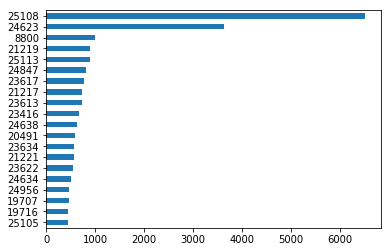

Column:  venueType
Unique values:  2 

app     48036
site      693
Name: venueType, dtype: int64 



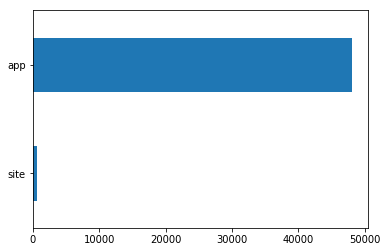

Column:  year
Unique values:  1 

2016    48729
Name: year, dtype: int64 



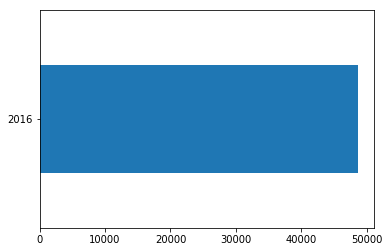

Column:  adWidth
Unique values:  5 

320    33114
300    13728
728     1779
480       96
666       12
Name: adWidth, dtype: int64 



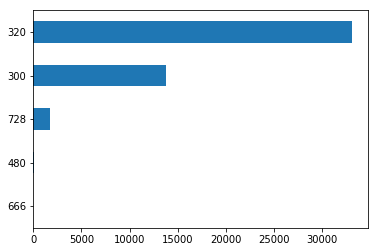

Column:  adHeight
Unique values:  6 

50     24090
250    13728
480     9024
90      1779
320       96
333       12
Name: adHeight, dtype: int64 



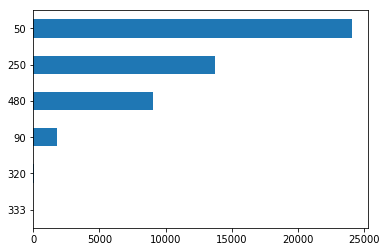

Column:  adArea
Unique values:  5 

16000     24090
75000     13728
153600     9120
65520      1779
221778       12
Name: adArea, dtype: int64 



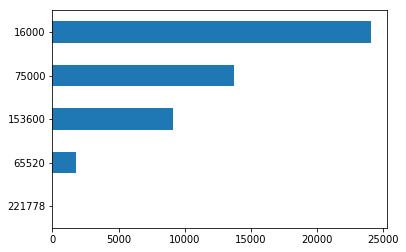

['Unnamed: 0', 'dimensions', 'impId', 'location', 'timestamp', 'udid', 'zip']


In [9]:
not_included = []

for column in clicks.columns:
    if len(clicks[column].value_counts()) < 2000:
        print("Column: ", column)
        print("Unique values: ", len(clicks[column].value_counts()), "\n")
        print(clicks[column].value_counts().head(20), "\n")
        plt.figure()
        clicks[column].value_counts().head(20).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        not_included.append(column)
        
print(not_included)

In [11]:
len(clicks['zip'].value_counts())

5646

In [20]:
bid_requests.head()

,Unnamed: 0,bidRequest_app_bundle,bidRequest_app_cat,bidRequest_app_domain,bidRequest_app_ext_nex_sdkv,bidRequest_app_id,bidRequest_app_keywords,bidRequest_app_name,bidRequest_app_publisher_ext_nex_else,bidRequest_app_publisher_id,bidRequest_app_publisher_name,bidRequest_app_storeurl,bidRequest_app_ver,bidRequest_at,bidRequest_badv,bidRequest_bcat,bidRequest_device_carrier,bidRequest_device_connectiontype,bidRequest_device_devicetype,bidRequest_device_didmd5,bidRequest_device_didsha1,bidRequest_device_dnt,bidRequest_device_dpidmd5,bidRequest_device_dpidsha1,bidRequest_device_geo_city,bidRequest_device_geo_country,bidRequest_device_geo_lat,bidRequest_device_geo_lon,bidRequest_device_geo_metro,bidRequest_device_geo_region,bidRequest_device_geo_type,bidRequest_device_geo_zip,bidRequest_device_h,bidRequest_device_hwv,bidRequest_device_ifa,bidRequest_device_ip,bidRequest_device_js,bidRequest_device_language,bidRequest_device_lmt,bidRequest_device_macmd5,bidRequest_device_macsha1,bidRequest_device_make,bidRequest_device_model,bidRequest_device_os,bidRequest_device_osv,bidRequest_device_ppi,bidRequest_device_ua,bidRequest_device_w,bidRequest_id,bidRequest_imp,bidRequest_regs_coppa,bidRequest_site_cat,bidRequest_site_domain,bidRequest_site_id,bidRequest_site_keywords,bidRequest_site_mobile,bidRequest_site_name,bidRequest_site_page,bidRequest_site_publisher_ext_nex_else,bidRequest_site_publisher_id,bidRequest_site_publisher_name,bidRequest_site_ref,bidRequest_user_ext_nex_dma,bidRequest_user_ext_nex_eth,bidRequest_user_ext_nex_hhi,bidRequest_user_ext_nex_marital,bidRequest_user_gender,bidRequest_user_geo_city,bidRequest_user_geo_country,bidRequest_user_geo_region,bidRequest_user_geo_type,bidRequest_user_geo_zip,bidRequest_user_id,bidRequest_user_keywords,bidRequest_user_yob,exchange,timestamp
0,0,com.sgiggle.production,"['IAB9', 'IAB14']",tango.me,NaN,96370,NaN,Tango Android,0.0,25533,Tango,https://play.google.com/store/apps/details?id=...,NaN,2,NaN,NaN,WIFI,2.0,4.0,NaN,NaN,0.0,NaN,NaN,SAN ANTONIO,USA,29.485300,-98.575600,641.0,TX,1.0,78229,NaN,NaN,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,72.177.132.31,1.0,NaN,0.0,NaN,NaN,NaN,NaN,Android,4.4.4,NaN,Mozilla/5.0 (Linux; Android 4.4.4; Z987 Build/...,NaN,ec44f3d8-5e21-49df-9849-5382abe69a07,"[{'bidfloor': 12.5, 'displaymanager': 'web', '...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,3.0,78229,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,NaN,NaN,Nexage,1473813254000
1,1,com.myyearbook.m,['IAB14'],meetme.com,6.1.0-5323db4.a,70578,NaN,myyearbook Android,0.0,19982,myYearbook.com,http://www.meetme.com/,NaN,2,"['clover.co', 'iamnaughty.com', 'skout.com', '...","['IAB8-5', 'IAB8-18', 'IAB14-1', 'IAB26', 'IAB...",VERIZON,3.0,4.0,NaN,NaN,0.0,NaN,NaN,CHELMSFORD,USA,42.592700,-71.375190,506.0,MA,1.0,01824,NaN,NaN,f59dbd62-55c1-493d-8bf8-03e9ef325ee3,198.223.238.80,1.0,en,0.0,NaN,NaN,Sprint,SM-G900P,Android,5.0,NaN,Mozilla/5.0 (Linux; Android 5.0; SM-G900V Buil...,NaN,9ccee7da-2fdc-43e9-ac6f-b7a2da2672f8,"[{'banner': {'api': [5, 3], 'battr': [1, 2, 3,...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,3.0,01824,f59dbd62-55c1-493d-8bf8-03e9ef325ee3,NaN,NaN,Nexage,1473813254000
2,2,com.fivemobile.thescore,"['IAB12', 'IAB17', 'news', 'sports']",NaN,NaN,agltb3B1Yi1pbmNyDAsSA0FwcBiq-uwTDA,NaN,TheScore - Android App,NaN,agltb3B1Yi1pbmNyEAsSB0FjY291bnQYpPHvEww,The Score,NaN,4.10.1,2,"['160tracker', 'avazu', 'adtrack', 'cbs', 'cbs...","['IAB11-2', 'IAB11-5', 'IAB17', 'IAB23', 'IAB2...",311-870,3.0,NaN,NaN,NaN,0.0,NaN,NaN,Chicago,USA,41.765766,-88.317680,602.0,IL,NaN,60636,720.0,NaN,085da3ca-bd97-48ed-993e-e7f163f8223a,66.87.76.70,1.0,en,NaN,NaN,NaN,zte,N9518,Android,5.1,NaN,Mozilla/5.0 (Linux; Android 5.1; N9518 Build/L...,1280.0,87ba3f2d-ac12-433e-9f78-a45204497e29,"[{'banner': {'api': [3, 5], 'battr': [1, 3, 8,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"allowHouseAds:false,language:en,league:mlb,ta

In [13]:
impressions.head()

,Unnamed: 0,ad,adSize,adType,age,auctionId,backendStatus,bestVenueName,bidPrice,campaign,carrier,country,day,deviceName,deviceType,dimensions,elbStatus,exchange,gender,iabCategories,landingPage,location,month,os,path,price,region,state,targetGroup,timestamp,udid,venueType,year,zip
0,0,15089,320x480,3rd Party Tag,NaN,1b4d838d-f3f3-452a-bca5-58d1c22a3508,200,Anchorfree-hotspot shield vpn-android,6.0,1643,WIFI,usa,16,hisense,4,eJw9kNtqwzAMhl8l6NpJfEidOKUXLWwQ2NbBSnfR9MKr3S...,200,nexage,NaN,"['IAB19', 'IAB9']",https://ad.doubleclick.net/ddm/jump/N636.19163...,"[38.9499, -77.2223]",9,android,/p,4.0700,VA,usa-va,21831,2016-09-16 02:15:49.094,NaN,app,2016,22102
1,1,17248,320x50,3rd Party Tag,44.0,ae483c4d-003e-4b35-abdc-cf9650fb1ba6,200,Between (android),3.0,1709,VERIZON,usa,16,samsung sm-g920v,4,eJwtkN1Kw0AQhV8lzJXCbrJ_yWYDIhYUeqMiRcSmF5PsNh...,200,mopub,F,['IAB14'],https://adfarm.mediaplex.com/ad/ck/31045-22536...,"[31.941742, -106.41464]",9,android,/win-notice,0.6900,TX,usa-tx,25127,2016-09-16 02:15:49.949,7311e9dc-3e0b-4e82-bfec-da0e9e3d34db,app,2016,79934
2,2,12187,728x90,Hosted,NaN,2mm5zEJ2mh,200,Jigsaw collection hd_jigsaw collection hd - io...,4.5,1389,WLAN,usa,16,apple ipad 4,5,eJxtUMtOwzAQ_JVoz-vUj0Tx5lZKK0AIjhxaFLmJaYPcOk...,200,smaato,F,"['IAB9', 'IAB9-5']",http://www.iriseaboveco.org,"[39.7199, -104.8918]",9,ios,/p,4.3125,CO,usa-co,18007,2016-09-16 02:15:53.914,29997981-F239-45C4-933C-842D7E9E3582,app,2016,80230
3,3,16897,320x480,Rich media,NaN,2zeOYLrni4,200,My talking tom - android s2s_my talking tom - ...,4.0,1579,UNKNOWN - PROBABLY WLAN,usa,16,samsung sgh-i337z,4,eJx1UNtqwzAM_RWjZyf1rXGSt_RtrEtHYZStHcFr0sYsTk...,200,smaato,NaN,['IAB9'],http://unwash.com,"[33.647507, -112.3884]",9,android,/p,4.0000,AZ,usa-az,24623,2016-09-16 02:15:54.913,NaN,app,2016,85374
4,4,12187,728x90,Hosted,NaN,248yILFDgH,200,Jigsaw collection hd_jigsaw collection hd - io...,4.5,1389,WLAN,usa,16,apple ipad 4 (cdma),5,eJxtUEFOwzAQ_Eq0J5DWqTexk7i3pBUChODIgaLITUwb5N...,200,smaato,F,"['IAB9', 'IAB9-5']",http://www.iriseaboveco.org,"[39.764, -105.018]",9,ios,/p,4.3125,CO,usa-co,18007,2016-09-16 02:15:55.786,6143B558-6D77-4BD1-BD22-A904A66914CC,app,2016,80211


In [ ]:
# adSize is a string of form "[width]x[height]".  Mutate into numerical adWidth, adHeight, adArea columns
dimensions = clicks['adSize'].str.split('x')
clicks['adWidth'], clicks['adHeight'] = pd.to_numeric(dimensions.str.get(0)), pd.to_numeric(dimensions.str.get(1))
clicks['adArea'] = clicks['adWidth'] * clicks['adHeight']